In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Read the data

In [2]:
df = pd.read_csv('medical_examination.csv')

## Display first 5 rows

In [3]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## The dataset has 70000 rows and 13 columns

In [4]:
df.shape

(70000, 13)

## This shows that there are no missing values

In [5]:
df.isna().sum()

id             0
age            0
sex            0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## This shows that there are no duplicated rows 

In [6]:
df[df.duplicated()].shape

(0, 13)

## This converts the heights from centimetres to metres by dividing each row height by 100

In [7]:
df['height_m'] = df.height / 100

## Displays the first 2 rows

In [8]:
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1.68
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.56


## Caluclates the BMI using the weight in Kg and the square of the height in m

In [9]:
df['BMI'] = df.weight / df.height_m ** 2

## Displays the first 2 rows

In [10]:
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1.68,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.56,34.927679


## This checks if a person is overweighted or not  using their BMI

In [11]:
df['overweight'] = np.where(df.BMI > 25, 1, 0)

## Displays the first 5 rows

In [12]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1.68,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.56,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1.65,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.69,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1.56,23.011177,0


## Shows the distinct values of the cholesterol column

In [13]:
df.cholesterol.unique()

array([1, 3, 2], dtype=int64)

## Shows the distinct values of the gluc column

In [14]:
df.gluc.unique()

array([1, 2, 3], dtype=int64)

## This is a function that swaps x for 0 if it is 1 and for 1 if it is any other number

In [15]:
def swap(x):
    if x == 1:
        x = 0
    else:
        x = 1
    return x

## This applys the function swap to the cholesterol column

In [16]:
df['cholesterol'] = df.cholesterol.apply(swap)

## This applys the function swap to the gluc column

In [17]:
df['gluc'] = df.gluc.apply(swap)

## Displays the first 5 rows

In [18]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1.68,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.56,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1.65,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.69,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1.56,23.011177,0


## Get the long format of all the categorical columns using the identifier variable as cardio and the rest of the categorical columns and the value variables

In [19]:
cat_data = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'])

## This displays the long format data

In [20]:
cat_data

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


## This creates a new column total and assigns 1 to it

In [21]:
cat_data['total'] = 1

## This displays the data

In [22]:
cat_data

,cardio,variable,value,total
0,0,cholesterol,0,1
1,1,cholesterol,1,1
2,1,cholesterol,1,1
3,1,cholesterol,0,1
4,0,cholesterol,0,1
...,...,...,...,...
419995,0,overweight,1,1
419996,1,overweight,1,1
419997,1,overweight,1,1
419998,1,overweight,1,1


## This groups the data by cardio then by variable then finally by value and makes it a dataframe instead of a series

In [23]:
grouped_data = cat_data.groupby(['cardio', 'variable', 'value'], as_index=False).count()

## This displays the grouped data 

In [24]:
grouped_data

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


## This uses seaborns factorplot to visualize the long format data

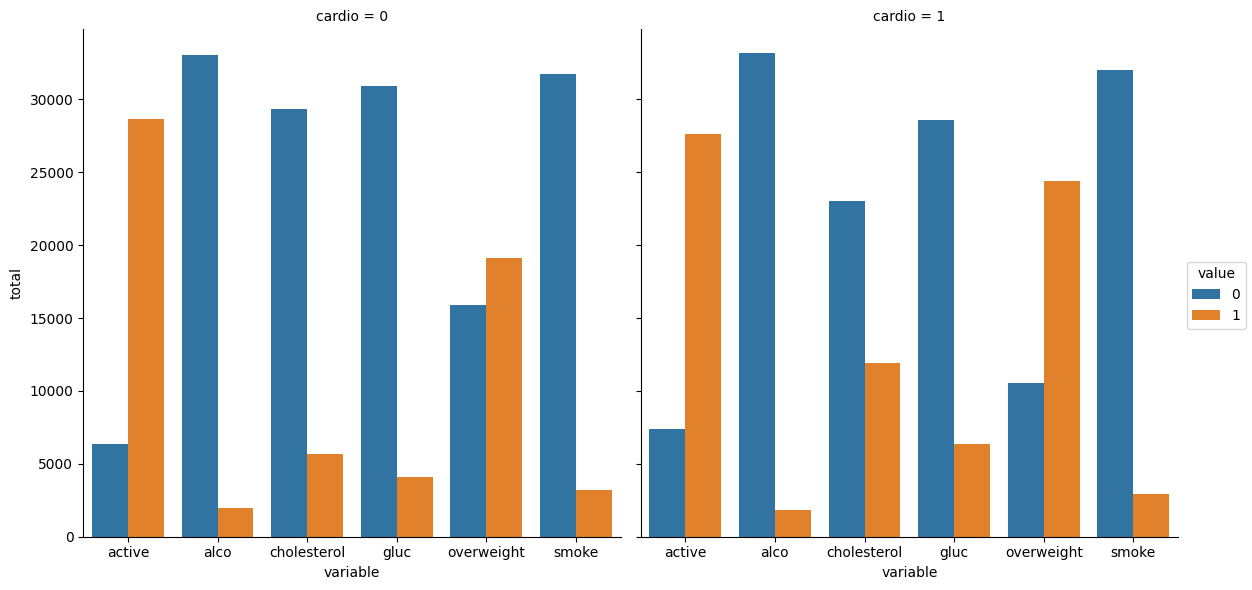

In [25]:
sns.factorplot(data=grouped_data, x='variable', y='total', col='cardio', hue='value', kind='bar', size=6)

## This removes cases where the diastolic pressure is heigher than systolic

In [26]:
clean_data = df[df['ap_lo'] <= df['ap_hi']]

## This shows that 68766 rows remain of that operation

In [27]:
clean_data.shape

(68766, 16)

## This removes the cases where the height is less than 2.5th percentile

In [28]:
clean_data = clean_data[clean_data.height >= clean_data.height.quantile(0.025)]

## This shows that 67260 rows remain of that operation

In [29]:
clean_data.shape

(67260, 16)

## This removes the cases where the height is greater than 97.5th percentile

In [30]:
clean_data = clean_data[clean_data.height <= clean_data.height.quantile(0.975)]

## This shows that 65859 rows remain of that operation

In [31]:
clean_data.shape

(65859, 16)

## This removes the cases where the weight is less than 2.5th percentile

In [32]:
clean_data = clean_data[clean_data.weight >= clean_data.weight.quantile(0.025)]

## This shows that 64384 rows remain of that operation

In [33]:
clean_data.shape

(64384, 16)

## This removes the cases where the weight is greater than 97.5th percentile

In [34]:
clean_data = clean_data[clean_data.weight <= clean_data.weight.quantile(0.975)]

## This shows that 62784 rows remain of that operation

In [35]:
clean_data.shape

(62784, 16)

## This gets the correlation values between the columns in the dataframe

In [36]:
corr = clean_data.corr()
mask = np.triu(corr, 0)

## This creates a heatmap using seaborns heatmap package

<AxesSubplot: >

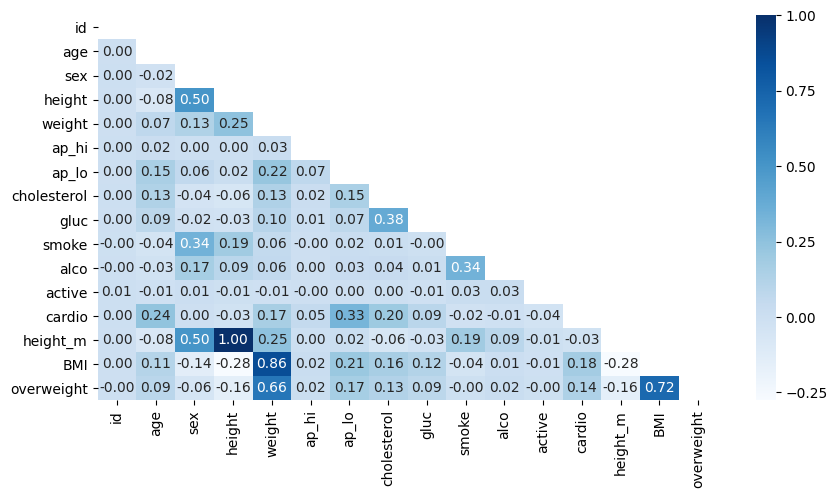

In [37]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr, mask=mask, annot=True, cmap='Blues', fmt='.2f')